## Notebook 01 Data Loading and Cleaning

**Purpose:**  
Load the raw bakery sales datasets, inspect their structure and quality and prepare daily time series data suitable for machine learning forecasting models.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load croissant sales data
croissant_df = pd.read_csv("../data/raw/Pink CroissantSales March - Oct 2025.csv")

# Load coffee sales data
coffee_df = pd.read_csv("../data/raw/Pink CoffeeSales March - Oct 2025.csv")

In [7]:
croissant_df.head()

,Date,Number Sold
0,01/03/2025,82
1,02/03/2025,67
2,03/03/2025,75
3,04/03/2025,87
4,05/03/2025,58


In [8]:
coffee_df.head()

,Date,Number Sold,Unnamed: 2
0,NaN,Cappuccino,Americano
1,01/03/2025,82,100
2,02/03/2025,67,103
3,03/03/2025,75,91
4,04/03/2025,87,92


In [9]:
croissant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         230 non-null    object
 1   Number Sold  230 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [10]:
coffee_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         230 non-null    object
 1   Number Sold  231 non-null    object
 2   Unnamed: 2   231 non-null    object
dtypes: object(3)
memory usage: 5.5+ KB


### Initial Data Inspection

The datasets were successfully loaded from CSV format.  
Each dataset contains sales records over time for a specific product category.

Initial inspection shows the presence of date related fields and numerical sales quantities making the data suitable for time series forecasting.  
Further cleaning and preprocessing will be required, especially around date parsing and aggregation.

In [11]:
croissant_df.columns, coffee_df.columns

(Index(['Date', 'Number Sold'], dtype='object'),
 Index(['Date', 'Number Sold', 'Unnamed: 2'], dtype='object'))

In [12]:
croissant_df['Date'] = pd.to_datetime(croissant_df['Date'])
coffee_df['Date'] = pd.to_datetime(coffee_df['Date'])

ValueError: time data "13/03/2025" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [14]:
croissant_df['Date'] = pd.to_datetime(
    croissant_df['Date'],
    dayfirst=True
)

coffee_df['Date'] = pd.to_datetime(
    coffee_df['Date'],
    dayfirst=True
)


In [15]:
croissant_df['Date'].head()

0   2025-03-01
1   2025-03-02
2   2025-03-03
3   2025-03-04
4   2025-03-05
Name: Date, dtype: datetime64[ns]

In [16]:
croissant_df = croissant_df.sort_values('Date')
coffee_df = coffee_df.sort_values('Date')

In [17]:
croissant_df.columns

Index(['Date', 'Number Sold'], dtype='object')

In [18]:
daily_croissant = (
    croissant_df
    .groupby('Date')['Number Sold']
    .sum()
    .reset_index()
)

daily_coffee = (
    coffee_df
    .groupby('Date')['Number Sold']
    .sum()
    .reset_index()
)

In [19]:
# Drop the first row which contains product names, not sales data
coffee_df = coffee_df.drop(index=0).reset_index(drop=True)

# Rename columns to meaningful names
coffee_df.columns = ['Date', 'Cappuccino', 'Americano']

In [20]:
coffee_df.head()

,Date,Cappuccino,Americano
0,2025-03-01,82,100
1,2025-03-02,67,103
2,2025-03-03,75,91
3,2025-03-04,87,92
4,2025-03-05,58,89


In [21]:
coffee_df['Date'] = pd.to_datetime(coffee_df['Date'], dayfirst=True)

coffee_df['Cappuccino'] = pd.to_numeric(coffee_df['Cappuccino'])
coffee_df['Americano'] = pd.to_numeric(coffee_df['Americano'])

In [22]:
daily_cappuccino = coffee_df[['Date', 'Cappuccino']].copy()
daily_americano = coffee_df[['Date', 'Americano']].copy()

In [23]:
daily_cappuccino.info(), daily_americano.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        230 non-null    datetime64[ns]
 1   Cappuccino  230 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       230 non-null    datetime64[ns]
 1   Americano  230 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB


(None, None)

### Coffee Sales Data Restructuring

The coffee sales dataset was initially stored in a wide format, where each column represented a different coffee product (like Cappuccino and Americano).  
The first row contained product names rather than numerical sales data and was therefore removed.

Columns were renamed for clarity, dates were parsed using a day first format, and sales values were converted to numeric types.  
This resulted in separate clean daily time series datasets for each coffee product, suitable for forecasting.

In [24]:
daily_croissant.head()

,Date,Number Sold
0,2025-03-01,82
1,2025-03-02,67
2,2025-03-03,75
3,2025-03-04,87
4,2025-03-05,58


In [27]:
daily_americano.head()


,Date,Americano
0,2025-03-01,100
1,2025-03-02,103
2,2025-03-03,91
3,2025-03-04,92
4,2025-03-05,89


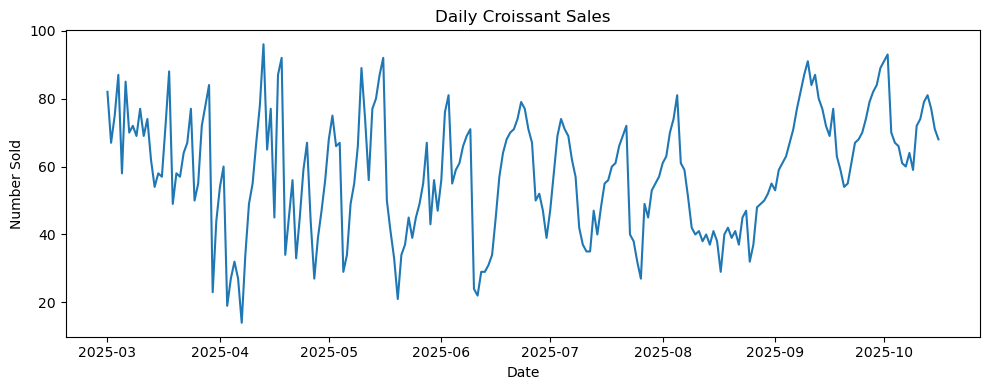

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(daily_croissant['Date'], daily_croissant['Number Sold'])
plt.title('Daily Croissant Sales')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.tight_layout()
plt.show()

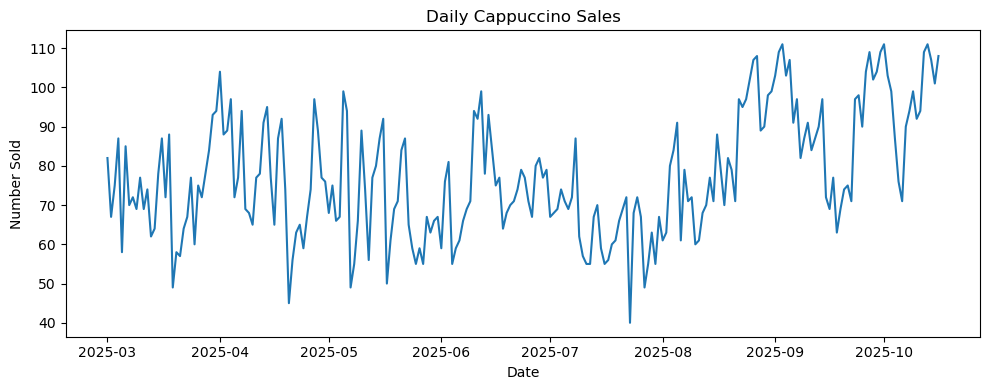

In [29]:
plt.figure(figsize=(10, 4))
plt.plot(daily_cappuccino['Date'], daily_cappuccino['Cappuccino'])
plt.title('Daily Cappuccino Sales')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.tight_layout()
plt.show()


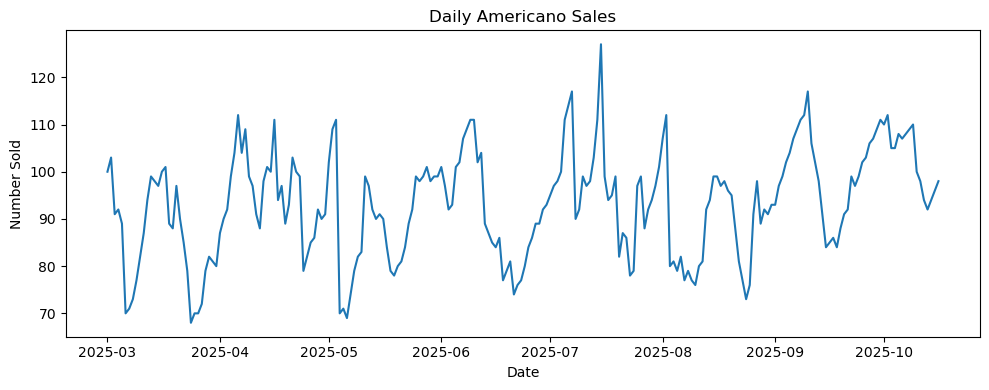

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(daily_americano['Date'], daily_americano['Americano'])
plt.title('Daily Americano Sales')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.tight_layout()
plt.show()

### Exploratory Time Series Analysis

Visual inspection of the daily sales data shows fluctuations over time with short term variability.  
While clear long term trends are limited due to the relatively short historical window, the data shows temporal structure suitable for time series forecasting.

Coffee products show distinct sales behaviours, justifying separate forecasting models per product.  
These observations support the use of classical time series forecasting approaches rather than simple averaging.

### Forecasting Algorithm Selection

ARIMA was selected as a baseline forecasting model due to its suitability for short term time series prediction and its popular use in academic literature.

Given the daily granularity of the sales data and the likelihood of weekly sales patterns in a bakery environment, a seasonal extension of ARIMA (SARIMA) was also considered.  
SARIMA allows seasonal components to be explicitly modelled and is appropriate where repeating weekly behaviour might exist.

Although the available historical data limits the number of complete seasonal cycles, SARIMA was included to evaluate whether seasonal modelling provides improved forecasting performance compared to a non-seasonal baseline.


In [31]:
# Prepare croissant time series for ARIMA
croissant_ts = daily_croissant.copy()
croissant_ts = croissant_ts.set_index('Date')
croissant_ts = croissant_ts.sort_index()

croissant_ts.head()

,Number Sold
Date,
2025-03-01,82
2025-03-02,67
2025-03-03,75
2025-03-04,87
2025-03-05,58


In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
ARIMA(1,1,1) #Do not run this cell again

TypeError: 'int' object is not subscriptable

In [34]:
# Train ARIMA(1,1,1) model
arima_model = ARIMA(croissant_ts['Number Sold'], order=(1, 1, 1))
arima_result = arima_model.fit()

C:\Users\esila\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\esila\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\esila\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [35]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Number Sold   No. Observations:                  230
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -901.588
Date:                Thu, 29 Jan 2026   AIC                           1809.175
Time:                        10:25:29   BIC                           1819.476
Sample:                    03-01-2025   HQIC                          1813.331
                         - 10-16-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7045      0.058     12.061      0.000       0.590       0.819
ma.L1         -0.9797      0.033    -29.767      0.000      -1.044      -0.915
sigma2       152.8430     10.253     14.907      0.000     132.748     172.938
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               189.31
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# Forecast next 28 days (4 weeks)
forecast_steps = 28
arima_forecast = arima_result.forecast(steps=forecast_steps)

arima_forecast

2025-10-17    66.830312
2025-10-18    66.006314
2025-10-19    65.425840
2025-10-20    65.016919
2025-10-21    64.728851
2025-10-22    64.525918
2025-10-23    64.382960
2025-10-24    64.282252
2025-10-25    64.211307
2025-10-26    64.161329
2025-10-27    64.126121
2025-10-28    64.101319
2025-10-29    64.083847
2025-10-30    64.071538
2025-10-31    64.062868
2025-11-01    64.056759
2025-11-02    64.052456
2025-11-03    64.049425
2025-11-04    64.047290
2025-11-05    64.045785
2025-11-06    64.044725
2025-11-07    64.043979
2025-11-08    64.043453
2025-11-09    64.043083
2025-11-10    64.042822
2025-11-11    64.042638
2025-11-12    64.042508
2025-11-13    64.042417
Freq: D, Name: predicted_mean, dtype: float64

In [37]:
# Create forecast date index
last_date = croissant_ts.index[-1]

forecast_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=1),
    periods=forecast_steps,
    freq='D'
)

arima_forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Predicted Number Sold': arima_forecast.values
})

arima_forecast_df.head()


,Date,Predicted Number Sold
0,2025-10-17,66.830312
1,2025-10-18,66.006314
2,2025-10-19,65.425840
3,2025-10-20,65.016919
4,2025-10-21,64.728851


In [38]:
# Save ARIMA forecast to outputs folder
arima_forecast_df.to_csv(
    "../outputs/predictions/arima_croissant_4week_forecast.csv",
    index=False
)

### ARIMA Forecast Results

An ARIMA(1,1,1) model was trained on daily croissant sales data and used to forecast demand for the next 28 days.  
The model parameters were statistically significant and residual diagnostics indicated no remaining autocorrelation.

This forecast serves as a non-seasonal baseline and will be compared against a SARIMA model that explicitly captures weekly seasonality.

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX